**1.采用梯度下降法求解函数f的极小值**
$$f(x,y) = 3(1-x)^2e^{-x^2-(y+1)^2} - 10(\frac{x}{5}-x^3-y^5)e^{-x^2-y^2} - \frac{1}{3}e^{-(x+1)^2-y^2}$$

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
# 定义原始函数
def function1(x,y):
    f=3* ((1-x)**2) * np.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*np.exp(-x**2-y**2)-1.0/3*np.exp(-(x+1)**2-y**2)
    return f
# 检查函数定义正确性
# ans1=function1(0.228, -1.626)  # -6.551
# print(ans1)                    #-6.55112995295425

In [3]:
# 定义函数的梯度
def gradientfun(x,y):
    dx= (-6*(1-x)+3*(1-x)**2*(-2*x))*math.exp(-x**2-(y+1)**2)  \
        + (-2+30*x**2+20*x*(x/5-x**3-y**5))*math.exp(-x**2-y**2)  + 2.0/3*(x+1)*math.exp(-(x+1)**2-y**2)   
    dy= -6*(1-x)**2*(y+1)*math.exp(-x**2-(y+1)**2)  \
       + (50*(y**4)+20*y*(x/5-x**3-y**5))*math.exp(-x**2-y**2)   + 2.0/3*y*math.exp(-(x+1)**2-y**2)
    return (dx,dy)

In [2]:
function1(-0.200, -0.500)

3.101225337778793

In [4]:
gradientfun(-0.200, -0.500)

(-4.471847903682106, -1.0254482374169953)

使用双边误差逼近检查梯度

**方法**:
- 梯度检查的步骤如下：:
    1. $\theta^{+} = \theta + \varepsilon$
    2. $\theta^{-} = \theta - \varepsilon$
    3. $J^{+} = J(\theta^{+})$
    4. $J^{-} = J(\theta^{-})$
    5. $gradapprox = \frac{J^{+} - J^{-}}{2  \varepsilon}$
- 接下来，计算梯度的反向传播值，最后计算误差： 
$$ difference = \frac {\mid\mid grad - gradapprox \mid\mid_2}{\mid\mid grad \mid\mid_2 + \mid\mid gradapprox \mid\mid_2} \tag{1}$$

- 当difference小于10−7时，我们通常认为我们计算的结果是正确的。

In [17]:
def gradient_check(x,y,theta_x,theta_y,epsilon=1e-7):
    """
    实现梯度检查

    参数：
        x - 检查dy时x的定值
        y - 检查dx时y的定值
        theta_x ,theta_y  - 被扰动的点
        epsilon  - 扰动值

    返回：
        近似梯度和后向传播梯度之间的差异
    """
    #计算gradapprox_x
    thetaplus_x = theta_x + epsilon                               # Step 1
    thetaminus_x = theta_x - epsilon                              # Step 2
    J_plus = function1(thetaplus_x, y)                            # Step 3
    J_minus = function1(thetaminus_x, y)                          # Step 4
    gradapprox_x = (J_plus - J_minus) / (2 * epsilon)             # Step 5


    #检查gradapprox_x是否足够接近
    grad_x,_ = gradientfun(theta_x,y)
    
    numerator = np.linalg.norm(grad_x - gradapprox_x)                     
    denominator = np.linalg.norm(grad_x) + np.linalg.norm(gradapprox_x)    
    difference_x = numerator / denominator       
        
    
    if difference_x < 1e-7:
        print("梯度x检查：梯度正常!")
    else:
        print("梯度x检查：梯度超出阈值!") 

    #计算gradapprox_y
    thetaplus_y = theta_y + epsilon                               # Step 1
    thetaminus_y = theta_y - epsilon                              # Step 2
    J_plus =function1(x, thetaplus_y)                             # Step 3
    J_minus =function1(x, thetaminus_y)                           # Step 4
    gradapprox_y = (J_plus - J_minus) / (2 * epsilon)             # Step 5

    
    #检查gradapprox_y是否足够接近
    _,grad_y= gradientfun(x, theta_y)
    
    numerator = np.linalg.norm(grad_y - gradapprox_y)                     
    denominator = np.linalg.norm(grad_y) + np.linalg.norm(gradapprox_y)    
    difference_y = numerator / denominator                            

    if difference_y < 1e-7:
        print("梯度y检查：梯度正常!")
    else:
        print("梯度y检查：梯度超出阈值!")

   
    return difference_x,difference_y


In [18]:
x,y,theta_x ,theta_y=1,2,3,4 # 多次测验
difference = gradient_check(x,y,theta_x ,theta_y)
print("difference = " + str(difference))

梯度x检查：梯度正常!
梯度y检查：梯度正常!
difference = (5.555853172827622e-10, 4.4745699238559427e-10)


In [19]:
# 初值列表
x0_list=[ [-0.200, -0.500],[-0.200, -0.200],[-0.500, -0.500] ]

In [20]:
def gradient_descent(x0,iternumber=2000,eps=1e-5,alpha=0.01):
    """
    梯度下降法
    参数：
        x0:初值
        iternumber：最大迭代数
        eps：允许误差
        alpha：步长
    返回：
        cache：储存着每次迭代的 (当前点，当前梯度范数,当前函数值)  #以便打印
        iters：最终迭代数
        funvalue_cache：储存着每次迭代的当前函数值    #以便画图
    
    """
    iters=0  # 迭代计数
    funvalue=function1(x0[0],x0[1])  #计算函数值
    grad=np.array(gradientfun(x0[0],x0[1])).reshape(2,1)   
    
    cache=[(x0,np.linalg.norm(grad),funvalue)]  # 初始化cache（初值）
    funvalue_cache=[funvalue]     # 初始化（初值）
    
    while np.linalg.norm(grad)>=eps and iters<iternumber:
        
        x0=np.add(x0,np.multiply(alpha,-grad))
        funvalue=function1(x0[0],x0[1])
        grad=np.array(gradientfun(x0[0],x0[1])).reshape(2,1)
        
        cache.append((x0,np.linalg.norm(grad),funvalue))  # 加入缓存以便打印
        funvalue_cache.append(funvalue)      # 加入缓存以便画图
        
        iters=iters+1
        
        #打印每次情况
        print ("迭代了%3.0i次, gradient_norm为:%2.6f，函数值为: %2.3f" %(iters,cache[-1][-2], cache[-1][-1]))
        
    return iters,cache,funvalue_cache

初值为x0=-0.200,y0=-0.500
迭代了  1次, gradient_norm为:5.143014，函数值为: 2.878
迭代了  2次, gradient_norm为:5.612447，函数值为: 2.600
迭代了  3次, gradient_norm为:5.909656，函数值为: 2.276
迭代了  4次, gradient_norm为:5.957173，函数值为: 1.924
迭代了  5次, gradient_norm为:5.721961，函数值为: 1.575
迭代了  6次, gradient_norm为:5.237607，函数值为: 1.260
迭代了  7次, gradient_norm为:4.592220，函数值为: 1.002
迭代了  8次, gradient_norm为:3.889348，函数值为: 0.806
迭代了  9次, gradient_norm为:3.211770，函数值为: 0.668
迭代了 10次, gradient_norm为:2.607599，函数值为: 0.575
迭代了 11次, gradient_norm为:2.095135，函数值为: 0.513
迭代了 12次, gradient_norm为:1.674149，函数值为: 0.474
迭代了 13次, gradient_norm为:1.335610，函数值为: 0.449
迭代了 14次, gradient_norm为:1.067801，函数值为: 0.433
迭代了 15次, gradient_norm为:0.859458，函数值为: 0.422
迭代了 16次, gradient_norm为:0.701108，函数值为: 0.416
迭代了 17次, gradient_norm为:0.585359，函数值为: 0.411
迭代了 18次, gradient_norm为:0.506523，函数值为: 0.408
迭代了 19次, gradient_norm为:0.459745，函数值为: 0.405
迭代了 20次, gradient_norm为:0.440099，函数值为: 0.403
迭代了 21次, gradient_norm为:0.442350，函数值为: 0.401
迭代了 22次, gradient_norm为:0.461576

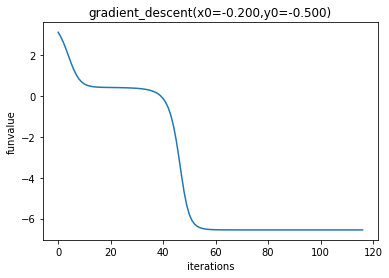

初值为x0=-0.200,y0=-0.200
迭代了  1次, gradient_norm为:4.734632，函数值为: 2.097
迭代了  2次, gradient_norm为:4.844443，函数值为: 1.871
迭代了  3次, gradient_norm为:4.910060，函数值为: 1.634
迭代了  4次, gradient_norm为:4.903563，函数值为: 1.393
迭代了  5次, gradient_norm为:4.798862，函数值为: 1.155
迭代了  6次, gradient_norm为:4.582715，函数值为: 0.929
迭代了  7次, gradient_norm为:4.261918，函数值为: 0.726
迭代了  8次, gradient_norm为:3.862453，函数值为: 0.553
迭代了  9次, gradient_norm为:3.421162，函数值为: 0.412
迭代了 10次, gradient_norm为:2.975015，函数值为: 0.302
迭代了 11次, gradient_norm为:2.553226，函数值为: 0.220
迭代了 12次, gradient_norm为:2.174310，函数值为: 0.159
迭代了 13次, gradient_norm为:1.846996，函数值为: 0.116
迭代了 14次, gradient_norm为:1.572823，函数值为: 0.084
迭代了 15次, gradient_norm为:1.348835，函数值为: 0.061
迭代了 16次, gradient_norm为:1.169638，函数值为: 0.044
迭代了 17次, gradient_norm为:1.028773，函数值为: 0.031
迭代了 18次, gradient_norm为:0.919555，函数值为: 0.021
迭代了 19次, gradient_norm为:0.835599，函数值为: 0.013
迭代了 20次, gradient_norm为:0.771164，函数值为: 0.007
迭代了 21次, gradient_norm为:0.721354，函数值为: 0.001
迭代了 22次, gradient_norm为:0.682200

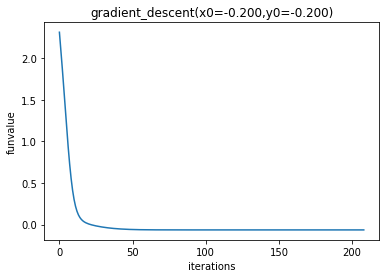

初值为x0=-0.500,y0=-0.500
迭代了  1次, gradient_norm为:4.037718，函数值为: 3.430
迭代了  2次, gradient_norm为:4.887590，函数值为: 3.249
迭代了  3次, gradient_norm为:5.827639，函数值为: 2.987
迭代了  4次, gradient_norm为:6.810377，函数值为: 2.618
迭代了  5次, gradient_norm为:7.747097，函数值为: 2.121
迭代了  6次, gradient_norm为:8.499657，函数值为: 1.490
迭代了  7次, gradient_norm为:8.899275，函数值为: 0.747
迭代了  8次, gradient_norm为:8.813522，函数值为: -0.045
迭代了  9次, gradient_norm为:8.234628，函数值为: -0.799
迭代了 10次, gradient_norm为:7.303161，函数值为: -1.441
迭代了 11次, gradient_norm为:6.227837，函数值为: -1.937
迭代了 12次, gradient_norm为:5.181049，函数值为: -2.292
迭代了 13次, gradient_norm为:4.255731，函数值为: -2.537
迭代了 14次, gradient_norm为:3.479940，函数值为: -2.702
迭代了 15次, gradient_norm为:2.846696，函数值为: -2.812
迭代了 16次, gradient_norm为:2.335777，函数值为: -2.886
迭代了 17次, gradient_norm为:1.924858，函数值为: -2.935
迭代了 18次, gradient_norm为:1.593933，函数值为: -2.969
迭代了 19次, gradient_norm为:1.326483，函数值为: -2.992
迭代了 20次, gradient_norm为:1.109352，函数值为: -3.009
迭代了 21次, gradient_norm为:0.932221，函数值为: -3.020
迭代了 22次, gradient_

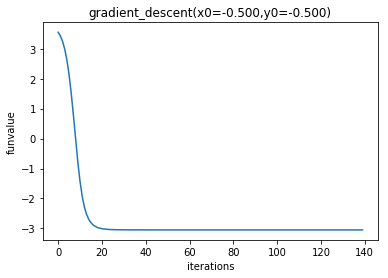

In [21]:
## 运行梯度下降法
for i in range(3):
    x0=x0_list[i]
    x0=np.array(x0).reshape(2,1)
    print( "初值为x0=%0.3f,y0=%0.3f"%(x0[0],x0[1])  )
    iters,cache,funvalue_cache=gradient_descent(x0,2000,eps=1e-5,alpha=0.01)
    print("")
    
    
    ## 画图
    costs = np.squeeze(funvalue_cache)
    plt.plot(costs)
    plt.ylabel('funvalue')
    plt.xlabel('iterations')
    plt.title("gradient_descent(x0=%0.3f,y0=%0.3f)" %(x0[0],x0[1]))
    plt.show()

**2.采用BFGS求解函数f的极小值**
$$f(x,y) = 3(1-x)^2e^{-x^2-(y+1)^2} - 10(\frac{x}{5}-x^3-y^5)e^{-x^2-y^2} - \frac{1}{3}e^{-(x+1)^2-y^2}$$

In [22]:
def function1(x,y):
    f=3* ((1-x)**2) * np.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*np.exp(-x**2-y**2)-1.0/3*np.exp(-(x+1)**2-y**2)
    return f
def gradientfun(x,y):
    dx= (-6*(1-x)+3*(1-x)**2*(-2*x))*math.exp(-x**2-(y+1)**2)  \
        + (-2+30*x**2+20*x*(x/5-x**3-y**5))*math.exp(-x**2-y**2)  + 2.0/3*(x+1)*math.exp(-(x+1)**2-y**2)   
    dy= -6*(1-x)**2*(y+1)*math.exp(-x**2-(y+1)**2)  \
       + (50*(y**4)+20*y*(x/5-x**3-y**5))*math.exp(-x**2-y**2)   + 2.0/3*y*math.exp(-(x+1)**2-y**2)
    return (dx,dy)
# 初值列表
x0_list=[ [-0.200, -0.500],[-0.200, -0.200],[-0.500, -0.500] ]

In [23]:
# 用Armijo条件,进行一维搜索求步长
def Armijo_search(x0,grad,iternumber=20,sigma = 0.4,gama = 0.7,rho = 0.3):
    """
    用Armijo条件,进行一维搜索求步长
    参数：
        x0：当前初值
        grad：当前梯度
        sigma，gama：两个搜索参数，其中gama没用到，一开始想用wolfe条件搜索，后来换了Armijo条件，但是忘记删除了
        rho：前进步长
    """
    iters=0
    m = 0;
    mk = 0
    while m < iternumber:#用Armijo搜索步数
        if function1((x0 + rho**m*(-grad))[0],(x0 + rho**m*(-grad))[1]) < function1(x0[0],x0[1]) + sigma*rho**m*np.dot(grad.T,-grad):
            mk = m
            break
        m += 1    
    alpha = rho**mk   # x0 = x0 - alpha*gradtemp
    return alpha   # 这里只返回alpha ，因为在计算中要用到这个中间值

In [24]:
def bfgs(x0,iternumbers=2000,eps=1e-5):
    """
    实现BFGS方法
    参数：
        x0: 迭代初值，numpy 向量(2,1)
        iternumbers：最大迭代数
        eps:允许误差
    返回：
        cache：储存着每次迭代的 (当前点，当前梯度范数,当前函数值)  #以便打印
        iters：最终迭代数
        funvalue_cache：储存着每次迭代的当前函数值    #以便画图
    """
    iters=0
    funvalue=function1(x0[0],x0[1])
    grad=np.array(gradientfun(x0[0],x0[1])).reshape(2,1)
    
    cache=[(x0,np.linalg.norm(grad),funvalue)]# 初始化cache（初值）
    funvalue_cache=[funvalue]  # 初始化（初值）
    
    B= np.eye(2)  # 初始化B为单位阵 
    d= -1.0*np.linalg.solve(B,grad)
    while iters < iternumbers and np.linalg.norm(grad) >= eps:
        
        gradtemp=grad  # 保存一下当前值
        alpha=Armijo_search(x0,gradtemp,iternumber=20,sigma = 0.4,gama = 0.7,rho = 0.55)   #Armijo搜索alpha值
        x0 = x0 - alpha*gradtemp 
        funvalue=function1(x0[0],x0[1])  # 计算新函数值
        grad=np.array(gradientfun(x0[0],x0[1])).reshape(2,1)  # 计算新梯度
        yk       =grad-gradtemp
        deltak   =alpha*d
        
        B=B+ np.dot(yk,yk.T)/np.dot(yk.T,deltak)- np.dot(np.dot(np.dot(B,deltak),deltak.T),B)/np.dot(np.dot(deltak.T,B),deltak)
        # 对Bk做矫正
        iters= iters+1

        cache.append((x0,np.linalg.norm(grad),funvalue))  # 加入缓存以便打印
        funvalue_cache.append(funvalue)      # 加入缓存以便画图
        
        #打印每次情况
        print ("迭代了%3.0i次, gradient_norm为:%2.5f，函数值为: %2.3f" %(iters,cache[-1][-2], cache[-1][-1]))
        
    return iters,cache,funvalue_cache

初值为x0=-0.200,y0=-0.500
迭代了  1次, gradient_norm为:2.71118，函数值为: 0.591
迭代了  2次, gradient_norm为:0.39004，函数值为: 0.397
迭代了  3次, gradient_norm为:0.80753，函数值为: 0.080
迭代了  4次, gradient_norm为:0.24093，函数值为: -0.061
迭代了  5次, gradient_norm为:0.12034，函数值为: -0.064
迭代了  6次, gradient_norm为:0.05558，函数值为: -0.065
迭代了  7次, gradient_norm为:0.02468，函数值为: -0.065
迭代了  8次, gradient_norm为:0.01075，函数值为: -0.065
迭代了  9次, gradient_norm为:0.00465，函数值为: -0.065
迭代了 10次, gradient_norm为:0.00201，函数值为: -0.065
迭代了 11次, gradient_norm为:0.00087，函数值为: -0.065
迭代了 12次, gradient_norm为:0.00037，函数值为: -0.065
迭代了 13次, gradient_norm为:0.00016，函数值为: -0.065
迭代了 14次, gradient_norm为:0.00007，函数值为: -0.065
迭代了 15次, gradient_norm为:0.00003，函数值为: -0.065
迭代了 16次, gradient_norm为:0.00001，函数值为: -0.065
迭代了 17次, gradient_norm为:0.00001，函数值为: -0.065



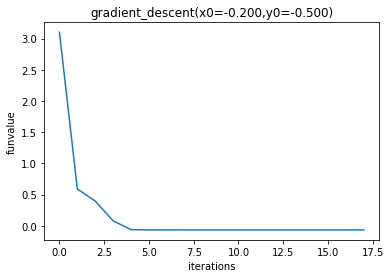

初值为x0=-0.200,y0=-0.200
迭代了  1次, gradient_norm为:0.52010，函数值为: -0.053
迭代了  2次, gradient_norm为:0.19709，函数值为: -0.063
迭代了  3次, gradient_norm为:0.07427，函数值为: -0.065
迭代了  4次, gradient_norm为:0.03047，函数值为: -0.065
迭代了  5次, gradient_norm为:0.01288，函数值为: -0.065
迭代了  6次, gradient_norm为:0.00551，函数值为: -0.065
迭代了  7次, gradient_norm为:0.00237，函数值为: -0.065
迭代了  8次, gradient_norm为:0.00103，函数值为: -0.065
迭代了  9次, gradient_norm为:0.00044，函数值为: -0.065
迭代了 10次, gradient_norm为:0.00019，函数值为: -0.065
迭代了 11次, gradient_norm为:0.00008，函数值为: -0.065
迭代了 12次, gradient_norm为:0.00004，函数值为: -0.065
迭代了 13次, gradient_norm为:0.00002，函数值为: -0.065
迭代了 14次, gradient_norm为:0.00001，函数值为: -0.065



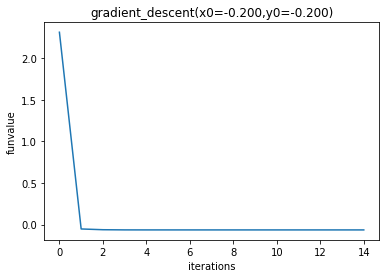

初值为x0=-0.500,y0=-0.500
迭代了  1次, gradient_norm为:3.54257，函数值为: -0.836
迭代了  2次, gradient_norm为:2.49282，函数值为: -2.606
迭代了  3次, gradient_norm为:0.90189，函数值为: -3.001
迭代了  4次, gradient_norm为:0.21008，函数值为: -3.047
迭代了  5次, gradient_norm为:0.04743，函数值为: -3.050
迭代了  6次, gradient_norm为:0.01132，函数值为: -3.050
迭代了  7次, gradient_norm为:0.00316，函数值为: -3.050
迭代了  8次, gradient_norm为:0.00109，函数值为: -3.050
迭代了  9次, gradient_norm为:0.00034，函数值为: -3.050
迭代了 10次, gradient_norm为:0.00011，函数值为: -3.050
迭代了 11次, gradient_norm为:0.00004，函数值为: -3.050
迭代了 12次, gradient_norm为:0.00001，函数值为: -3.050
迭代了 13次, gradient_norm为:0.00000，函数值为: -3.050



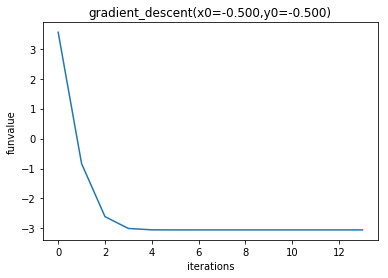

In [25]:
## 运行BFGS法
for i in range(3):
    x0=x0_list[i]
    x0=np.array(x0).reshape(2,1)
    print( "初值为x0=%0.3f,y0=%0.3f"%(x0[0],x0[1])  )
    iters,cache,funvalue_cache=bfgs(x0,iternumbers=2000,eps=1e-5)
    print("")
    
    
    ## 画图
    costs = np.squeeze(funvalue_cache)
    plt.plot(costs)
    plt.ylabel('funvalue')
    plt.xlabel('iterations')
    plt.title("gradient_descent(x0=%0.3f,y0=%0.3f)" %(x0[0],x0[1]))
    plt.show()